# Module 11 - Random Walks

## Goals

- Random walks in 1 and 2 dimensions


In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## One-dimensional random walker

Let's begin with a simple system where we have a 1D random walker that takes steps of a fixed size ($a$, our space is discretized). We also discretize time in uniform time steps of size $\Delta t$. Assuming that our walker takes a step to the right or to the left at every discrete point in time (it is not allowed to stay in place), there are two possible events with equal probability $P_{\text{right}} = P_{\text{left}} = \frac{1}{2}$ and the displacement takes values of size $\Delta x = \pm a$.

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Write a function that takes as input the number of steps/iterations ($N$) and returns the position of the walker at every step. Assume that $a=1$. Create a plot of the walker's displacement as a function of time/iteration.
</div>

In [2]:
def RW1D(N):
    x = np.zeros(N)
    for i in range(N-1):
        if (np.random.random() < 0.5):
            x[i+1] = x[i] + 1
        else:
            x[i+1] = x[i] - 1
    return x

# alternate definition
def RW1Db(N):
    x = np.zeros(N)
    for i in range(N-1):
        dx = np.random.random() - 0.5 # give dx a value between -0.5 and 0.5
        dx /= np.abs(dx)              # normalize the step size so that the magnitude is 1
        x[i+1] = x[i] + dx
    return x

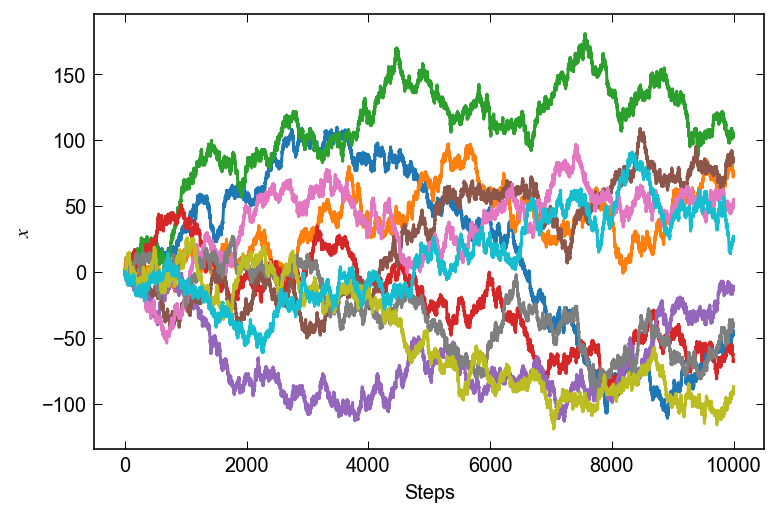

In [3]:
# plot 10 trials
N = 10000
x = []
plt.figure()
for i in range(10):
    x.append(RW1D(N))
    plt.plot(x[i])
plt.xlabel('Steps')
plt.ylabel(r'$x$')

On average, a random walker tends to return to the origin of the walk, $\left < x \right > = 0$, so after many steps the average net displacement is 0.

What about the average squared displacement, $\left < x^2 \right >$?

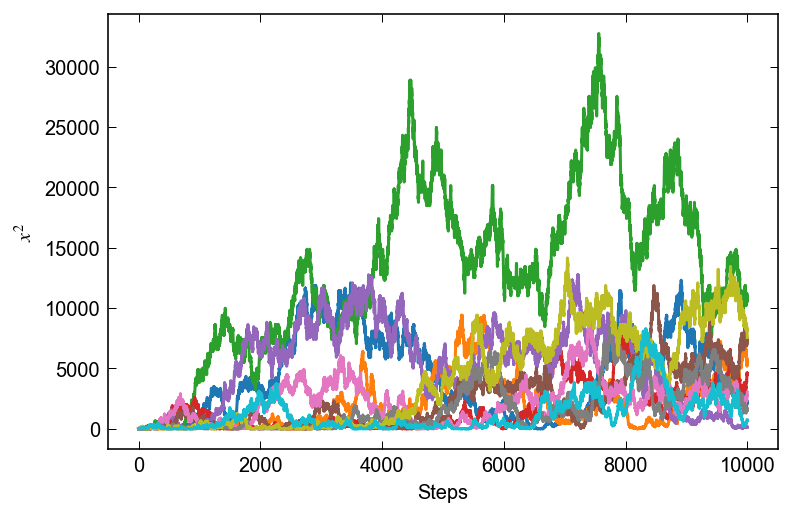

In [4]:
plt.figure()
for i in range(10):
    plt.plot(x[i]**2)
plt.xlabel('Steps')
plt.ylabel(r'$x^2$')

For a random walker $\left < x^2 \right > = Na^2$, or $\sqrt{\left < x^2 \right >} = \sqrt{N}a$.

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Run a large number random walks, with a small numer of iterations (100), and show that $\left < x \right > = 0$ and $\left < x^2 \right > = Na^2$.
</div>

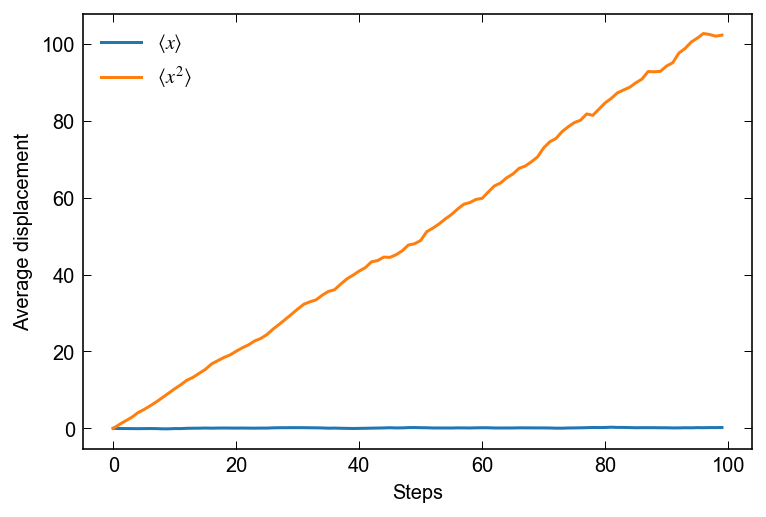

In [5]:
N = 100
xav = np.zeros(N)
x2av = np.zeros(N)
plt.figure()
trials = 1000

for i in range(trials):
    x = RW1D(N)
    xav += x
    x2av += x**2

xav /= trials
x2av /= trials
plt.plot(xav, label=r'$\left < x \right>$')
plt.plot(x2av, label=r'$\left < x^2 \right>$')
plt.xlabel('Steps')
plt.ylabel('Average displacement')
plt.legend()

### What is the probability of finding the random walker at some position $x$ after taking $N$ steps, $P(x;N)$ ?

If we take $N$ steps, there are $N_r$ right and $N_l$ left steps, $N = N_r + N_l$. The net displacement after $N$ steps is given by $x(n) = (N_r - N_l)a$. $P(x;N)$ can be obtained from the probability distribution of taking $N_r$ right steps out of a total number of steps, $N$.

\begin{equation}
    P(x;N) = P(N_r;N) = \binom{N}{N_r} P_r^{N_r} P_l^{N_l} = \frac{N!}{N_r!N_l!} \left( \frac{1}{2} \right)^N
\end{equation}

We can simplify this equation by using the relations $x = (N_r - N_l)a$ and $N = N_r + N_l$, as well as Stirling's approximation, $\log (n!) \approx n \log n - n + \frac{1}{2} \log(2\pi n)$ to obtain

\begin{equation}
    P(x;N) = \frac{1}{\sqrt{2\pi N a^2}} e^{-x^2/2Na^2}.
\end{equation}

The probability density for the walker's displacement after a number of steps is a Gaussian distribution of the form

\begin{equation}
    P(x;N) = \frac{1}{\sqrt{2\pi \sigma ^2}} e^{-(x-\mu)^2/2\sigma ^2},
\end{equation}

where $\mu$ is the mean, $\mu = \left < x \right> = 0$, and $\sigma ^2$ is the variance, $\sigma ^2 = \left < x^2 \right> = Na^2$.


<div class="span alert alert-success">
<h2>Programming challenge </h2>
Show that $P(x;N)$ behaves as predicted from a large number of random walks.
</div>

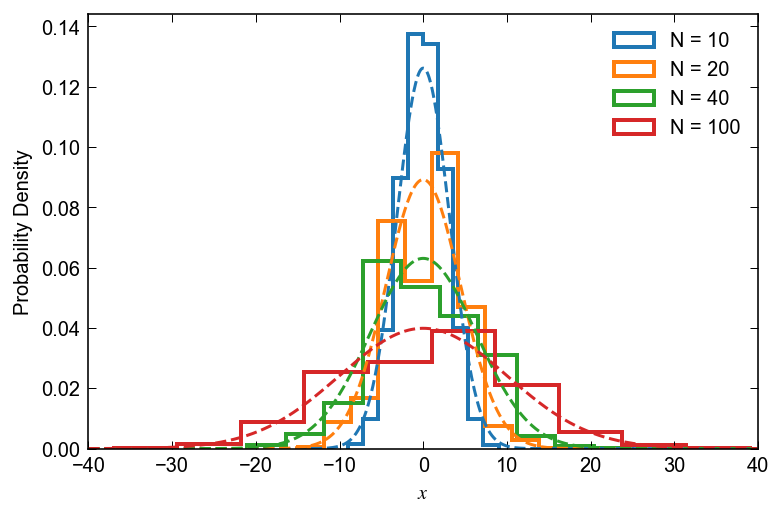

In [6]:
def P(x, N):
    return (1.0/np.sqrt(2*np.pi*N))*np.exp(-x**2/(2*N))

plt.figure()
trials = 10000
colors = ('C0', 'C1', 'C2', 'C3')
for j, N in enumerate([10, 20, 40, 100]):
    xN = np.zeros(trials)
    for i in range(trials):
        x = RW1D(N)
        xN[i] = x[-1]     # save the net displacement after N iterations
    plt.hist(xN, label='N = {0}'.format(N), normed=True, color=colors[j], histtype='step', align='mid', lw=2.0)
    x = np.arange(-40,40,0.1)
    plt.plot(x, P(x, N), ls='--', color=colors[j])
plt.xlabel(r'$x$')
plt.xlim(-40,40)
plt.ylabel('Probability Density')
plt.legend()

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Write a function that takes as input the number of steps/iterations ($N$) and returns the position of a 2D random walker at every step. Assume that $a=1$. Create a plot of the walker's displacement as a function of time/iteration.
</div>

In [7]:
def RW2D(N):
    x = np.zeros(N)
    y = np.zeros(N)
    for i in range(N-1):
        dx = np.random.random() - 0.5 # give dx a value between -0.5 and 0.5
        dy = np.random.random() - 0.5 # give dy a value between -0.5 and 0.5
        norm = np.sqrt(dx**2 + dy**2)
        dx /= norm              # normalize the step size so that the magnitude is 1
        dy /= norm              # normalize the step size so that the magnitude is 1
        x[i+1] = x[i] + dx
        y[i+1] = y[i] + dy
    return x, y

(-200, 200)

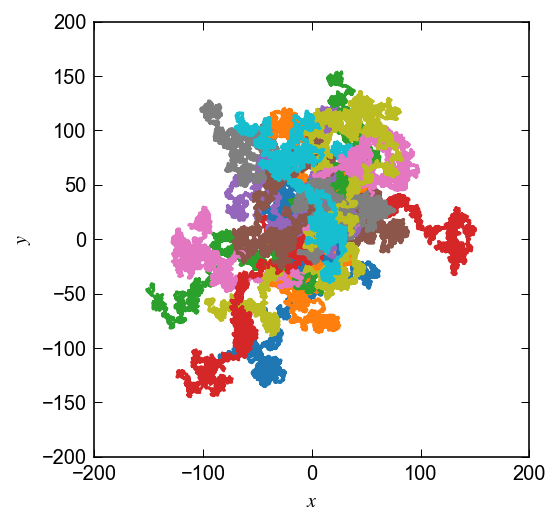

In [8]:
# plot 10 trials
N = 10000
plt.figure()
ax = plt.axes(aspect='equal')
for i in range(20):
    x, y = RW2D(N)
    ax.plot(x, y)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-200,200)
ax.set_ylim(-200,200)